In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from Utils import append_to_binary_results, report, _confusion_matrix, plot_roc_curve, plot_lost_history

## Análise exploratória dos dados

In [2]:
df = pd.read_csv("../Datasets/heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Observando a quantidade de linhas, colunas e os tipos de dados no dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
(df["target"].value_counts() / df.shape[0]) * 100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [7]:
# Estatísticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

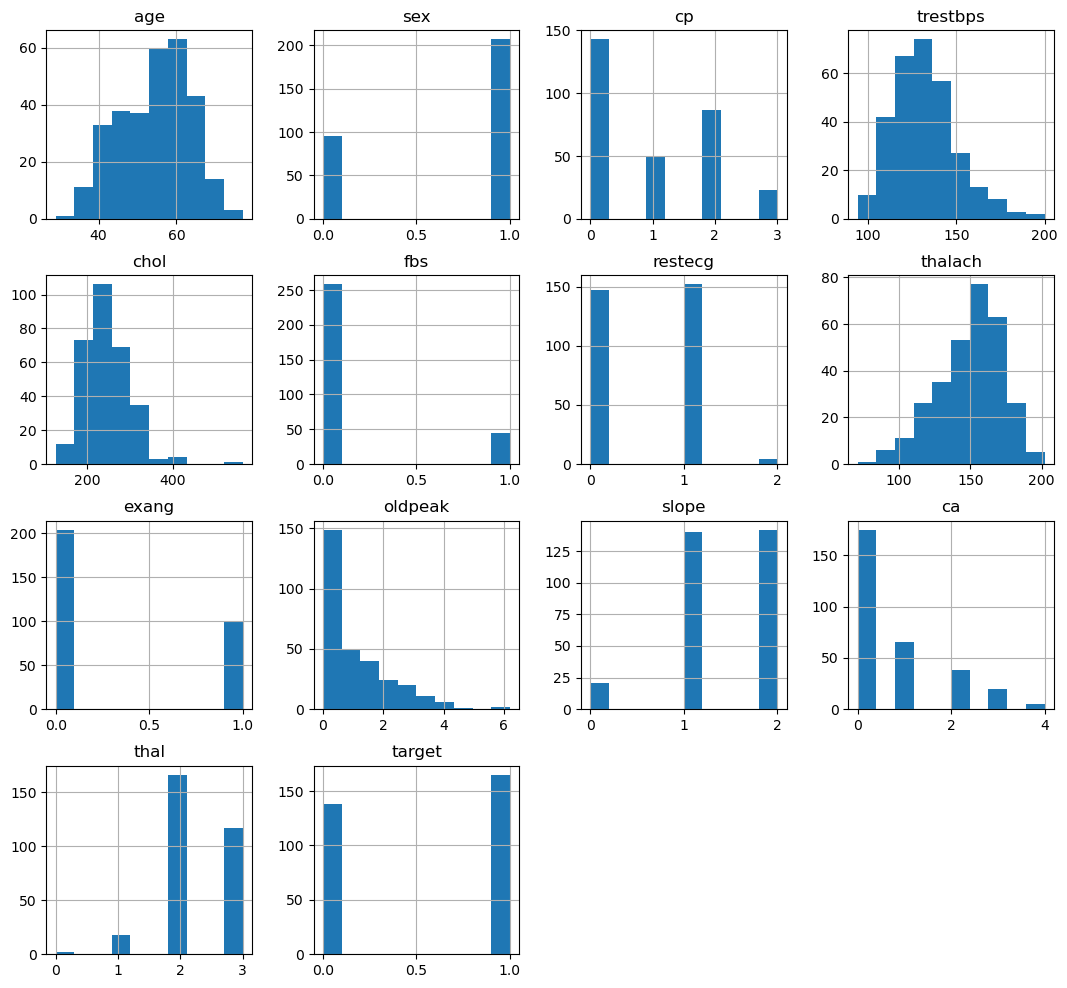

In [8]:
# Distribuição das variáveis independentes
df.hist(figsize=(13, 12))

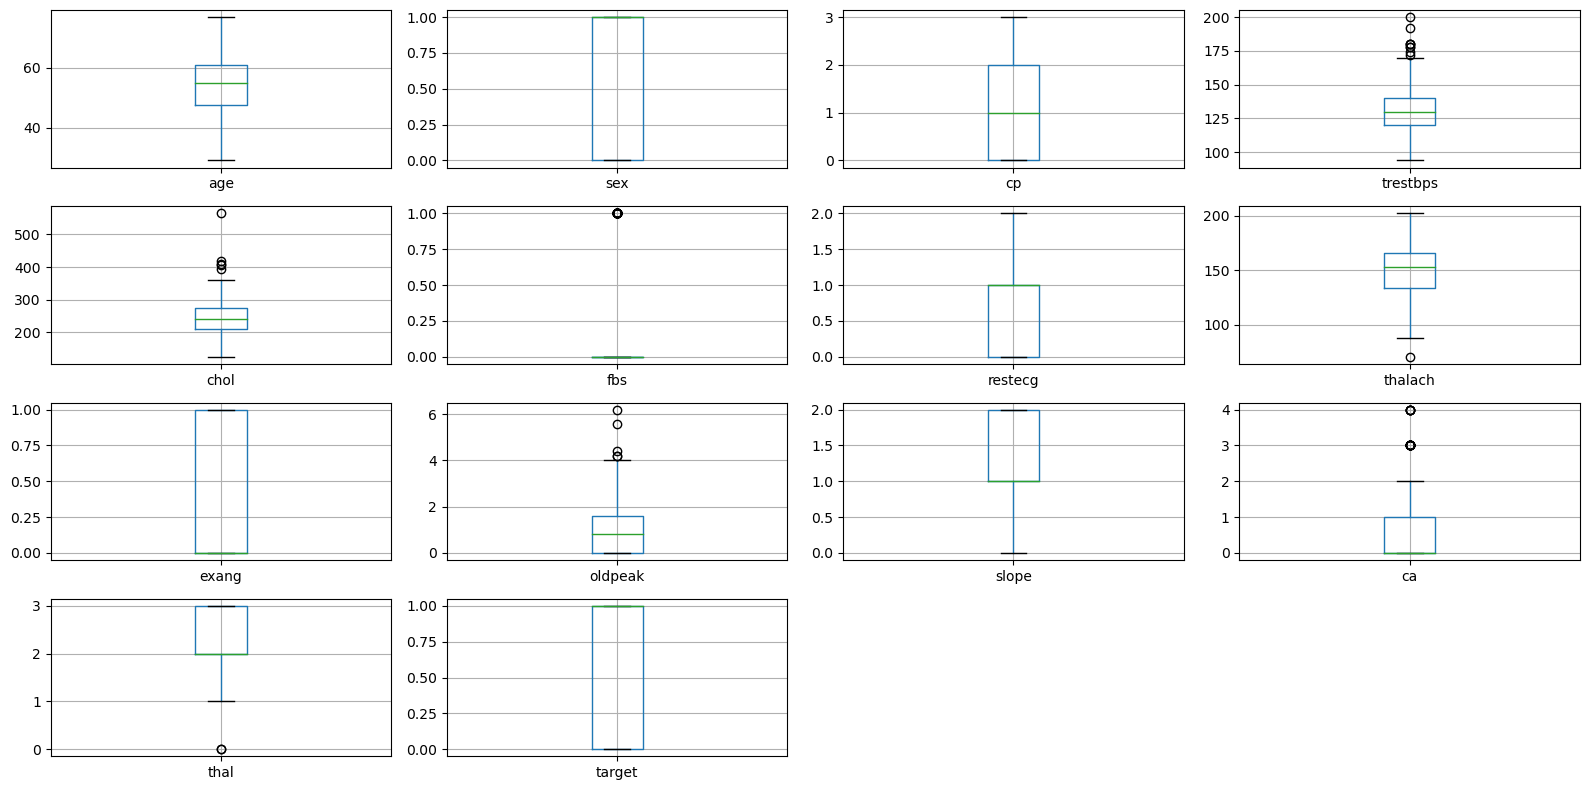

In [9]:
plt.figure(figsize=(16 , 8))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    df.boxplot(col)
    plt.tight_layout()

In [10]:
corr = df.corr()

<AxesSubplot:>

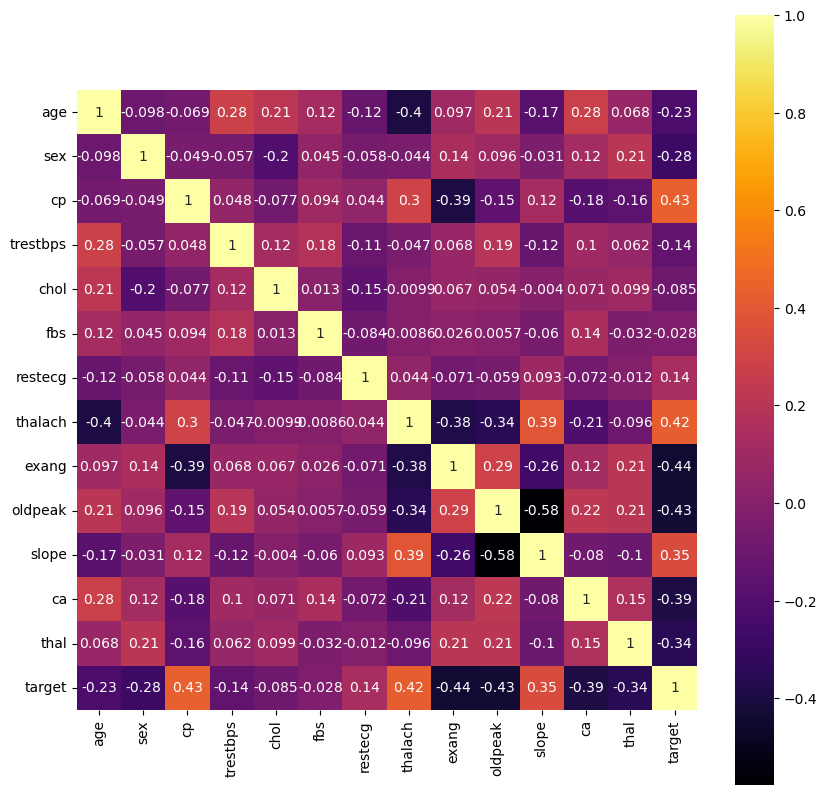

In [11]:
# Observando a correlação entre as features em relação a target
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

In [12]:
corr = df.corr()
corr["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

## Seleção de variáveis independentes

In [13]:
# As variáveis foram selecionadas com base na correlação com a target.
df_to_train = df[["cp", "thalach", "slope", "age", "sex", "thal", "ca", "oldpeak", "exang", "target"]]

In [14]:
df_to_train.shape

(303, 10)

In [15]:
df_to_train.shape

(303, 10)

In [16]:
# Criação de variáveis X e y 
X = df_to_train.drop("target", axis=1)
y = df_to_train[["target"]]

In [17]:
X.shape

(303, 9)

## Preparação dos dados

In [18]:
# Transformação das variáveis independentes (X) para um range de 0 - 1 para facilitar o processamento da rede.
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

In [19]:
# Divisão do dataset em treino e teste. Dataset de teste com 20%.
X_train, X_test, y_train, y_test = train_test_split(X_min_max_scaled, y, test_size=0.20, random_state=42)

In [20]:
tf.random.set_seed(42)

## Teste de algumas configurações de redes neurais

### Primeiro modelo

Epoch 1/800


2022-10-29 11:11:59.419036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 17ms/step - loss: 0.6071 - accuracy: 0.6777 - val_loss: 0.4935 - val_accuracy: 0.7869
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.8017 - val_loss: 0.3789 - val_accuracy: 0.8852
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8058 - val_loss: 0.4216 - val_accuracy: 0.8197
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8430 - val_loss: 0.3933 - val_accuracy: 0.8525
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8430 - val_loss: 0.4099 - val_accuracy: 0.8689
Epoch 6/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.8430 - val_loss: 0.3805 - val_accuracy: 0.9016
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.8125

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8099 - val_loss: 0.3986 - val_accuracy: 0.8852
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8347 - val_loss: 0.3977 - val_accuracy: 0.8525
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8306 - val_loss: 0.3622 - val_accuracy: 0.9016
Epoch 10/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8388 - val_loss: 0.3934 - val_accuracy: 0.8689
Epoch 11/800
8/8 [==============================] - 0s 4ms/step - loss: 0.3775 - accuracy: 0.8430 - val_loss: 0.4245 - val_accuracy: 0.8525
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3964 - accuracy: 0.8223 - val_loss: 0.3669 - val_accuracy: 0.8852
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8347 - val_loss: 0.3826 - val_accuracy: 0.8852
Epoch 14/800
8/8 [=================

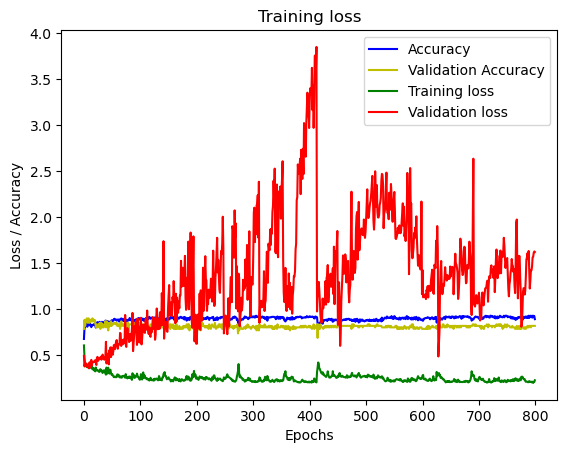

In [21]:
"""
    Configuração de rede neural inicial.
    Camadas escondidas e neurônios escolhidos sem critério. Apenas um teste inicial.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
first_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)
"""
    Loss: BinaryCrossentropy - Função usada para classificação binária.
    Optimizer: Adam com o learning rate controlado de 0.1. 
    from_logits=True - (A documentação do tensorflow recomenda passar esse argumento)
    Metrics: Accuracy
"""
first_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.1),
    metrics=['accuracy']
)
"""
    epochs: 800 - valor escolhido com base na diminuição do loss.
"""
first_history = first_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)
"""
    Plotando gráfico de loss
"""
plot_lost_history(first_history)

### Segundo modelo

Epoch 1/800


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 13ms/step - loss: 0.5727 - accuracy: 0.7149 - val_loss: 0.5591 - val_accuracy: 0.7049
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7314 - val_loss: 0.5237 - val_accuracy: 0.8033
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7521 - val_loss: 0.4755 - val_accuracy: 0.7869
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.7686 - val_loss: 0.4759 - val_accuracy: 0.8197
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7810 - val_loss: 0.4327 - val_accuracy: 0.8525
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.7934 - val_loss: 0.4287 - val_accuracy: 0.8033
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.3942 - accuracy: 0.7812

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8099 - val_loss: 0.4103 - val_accuracy: 0.8197
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8223 - val_loss: 0.4098 - val_accuracy: 0.8361
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8264 - val_loss: 0.4093 - val_accuracy: 0.8361
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8388 - val_loss: 0.3958 - val_accuracy: 0.8361
Epoch 11/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8347 - val_loss: 0.4151 - val_accuracy: 0.8361
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8388 - val_loss: 0.3938 - val_accuracy: 0.8525
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8306 - val_loss: 0.3945 - val_accuracy: 0.8525
Epoch 14/800
8/8 [=================

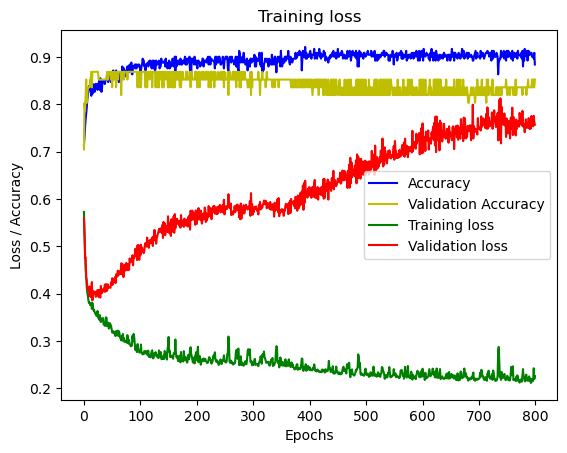

In [22]:
"""
    Configuração de rede neural inicial. Tentando optimizar com a diminução do learning rate.
    Repetindo configuração de camada escondida e quantidade de neurônios.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
second_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)
"""
    Loss: BinaryCrossentropy: Função usada para classificação binária.
    Optimizer: Adam com o learning rate controlado de 0.01. 
    from_logits=True: - A documentação do tensorflow recomenda passar esse argumento)
    Metrics: Accuracy
"""
second_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)
"""
    epochs: 800 - valor escolhido com base na diminuição do loss.
"""
second_history = second_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)
"""
    Plotando gráfico de loss
"""
plot_lost_history(second_history)

### Terceiro modelo

Epoch 1/800


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 13ms/step - loss: 0.6699 - accuracy: 0.5496 - val_loss: 0.6664 - val_accuracy: 0.5246
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5496 - val_loss: 0.6602 - val_accuracy: 0.5246
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.5496 - val_loss: 0.6550 - val_accuracy: 0.5246
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.5620 - val_loss: 0.6496 - val_accuracy: 0.5410
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.5661 - val_loss: 0.6443 - val_accuracy: 0.5574
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.5744 - val_loss: 0.6384 - val_accuracy: 0.6230
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.6031 - accuracy: 0.5938

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.5909 - val_loss: 0.6313 - val_accuracy: 0.6557
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6240 - val_loss: 0.6250 - val_accuracy: 0.6721
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6488 - val_loss: 0.6185 - val_accuracy: 0.6885
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6901 - val_loss: 0.6093 - val_accuracy: 0.7213
Epoch 11/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7314 - val_loss: 0.5978 - val_accuracy: 0.7869
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7686 - val_loss: 0.5864 - val_accuracy: 0.8033
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.7769 - val_loss: 0.5751 - val_accuracy: 0.8033
Epoch 14/800
8/8 [=================

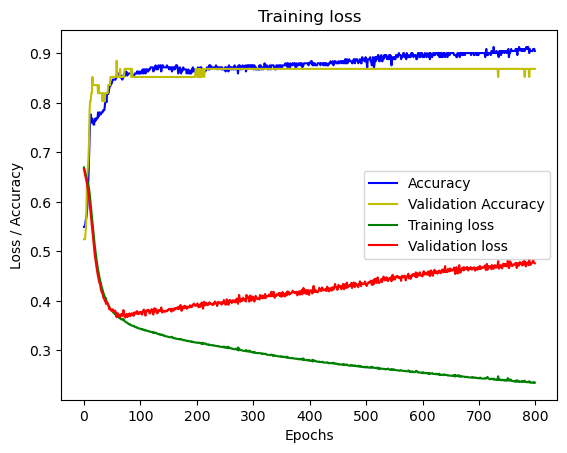

In [23]:
"""
    Testando outra configuração de rede neural.
    Camadas escondidas e neurônios escolhidos sem critério.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
third_model = Sequential(
    [
        Dense(10, activation = "relu", name="L1"),
        Dense(5, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)
"""
    Loss: BinaryCrossentropy - Função usada para classificação binária.
    Optimizer: Adam com o learning rate controlado de 0.001. 
    from_logits=True: - A documentação do tensorflow recomenda passar esse argumento)
    Metrics: Accuracy
"""
third_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
"""
    epochs: 800 - valor escolhido com base na diminuição do loss.
"""
third_history = third_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)
"""
    Plotando gráfico de loss
"""
plot_lost_history(third_history)

### Quarto modelo

Epoch 1/1200


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 14ms/step - loss: 0.7160 - accuracy: 0.5455 - val_loss: 0.7240 - val_accuracy: 0.4918
Epoch 2/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.5331 - val_loss: 0.7173 - val_accuracy: 0.4918
Epoch 3/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5372 - val_loss: 0.7120 - val_accuracy: 0.4918
Epoch 4/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5331 - val_loss: 0.7070 - val_accuracy: 0.5246
Epoch 5/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5413 - val_loss: 0.7025 - val_accuracy: 0.5246
Epoch 6/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5620 - val_loss: 0.6984 - val_accuracy: 0.5246
Epoch 7/1200
1/8 [==>...........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.5938

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5579 - val_loss: 0.6945 - val_accuracy: 0.5082
Epoch 8/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5950 - val_loss: 0.6910 - val_accuracy: 0.5082
Epoch 9/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.6157 - val_loss: 0.6875 - val_accuracy: 0.5246
Epoch 10/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6281 - val_loss: 0.6844 - val_accuracy: 0.5410
Epoch 11/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6322 - val_loss: 0.6814 - val_accuracy: 0.5738
Epoch 12/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6322 - val_loss: 0.6785 - val_accuracy: 0.5738
Epoch 13/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6364 - val_loss: 0.6752 - val_accuracy: 0.5574
Epoch 14/1200
8/8 [==========

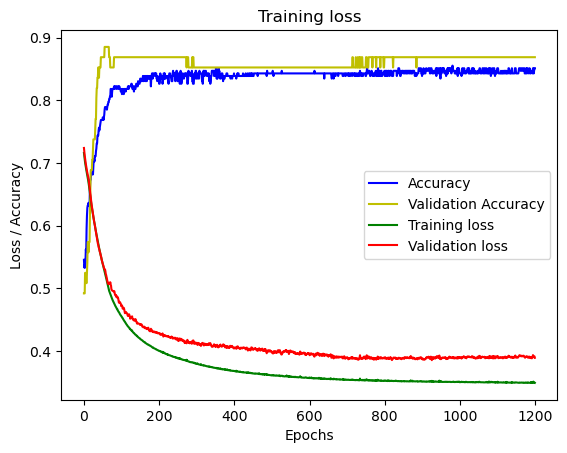

In [24]:
"""
    Voltando para a configuração de rede neural inicial devido ao comprtamento estranho do loss e da acurácia. 
    Camadas escondidas e neurônios de modelos anteriores.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
fourth_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)
"""
    Loss: BinaryCrossentropy: Função usada para classificação binária.
    Optimizer: Adam com o learning rate controlado de 0.01. 
    from_logits=True: - A documentação do tensorflow recomenda passar esse argumento)
    Metrics: Accuracy
"""
fourth_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
"""
    epochs: 1200 - Aumentando as épocas para observar o comportamento do loss e da acurácia.
"""
fourth_history = fourth_model.fit(
    X_train, 
    y_train,
    epochs=1200,
    validation_data=(X_test, y_test)
)
"""
    Plotando gráfico de loss
"""
plot_lost_history(fourth_history)

### Quinto modelo

Epoch 1/800


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 16ms/step - loss: 0.7000 - accuracy: 0.3058 - val_loss: 0.6967 - val_accuracy: 0.3607
Epoch 2/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.3306 - val_loss: 0.6944 - val_accuracy: 0.4262
Epoch 3/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4091 - val_loss: 0.6929 - val_accuracy: 0.4918
Epoch 4/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4793 - val_loss: 0.6915 - val_accuracy: 0.6066
Epoch 5/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5455 - val_loss: 0.6903 - val_accuracy: 0.6230
Epoch 6/800
1/8 [==>...........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.4688

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5826 - val_loss: 0.6889 - val_accuracy: 0.6557
Epoch 7/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6281 - val_loss: 0.6869 - val_accuracy: 0.6721
Epoch 8/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.6694 - val_loss: 0.6845 - val_accuracy: 0.7377
Epoch 9/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.7066 - val_loss: 0.6815 - val_accuracy: 0.7377
Epoch 10/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.7149 - val_loss: 0.6783 - val_accuracy: 0.7541
Epoch 11/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.7149 - val_loss: 0.6748 - val_accuracy: 0.8033
Epoch 12/800
8/8 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.7273 - val_loss: 0.6708 - val_accuracy: 0.8033
Epoch 13/800
8/8 [==================

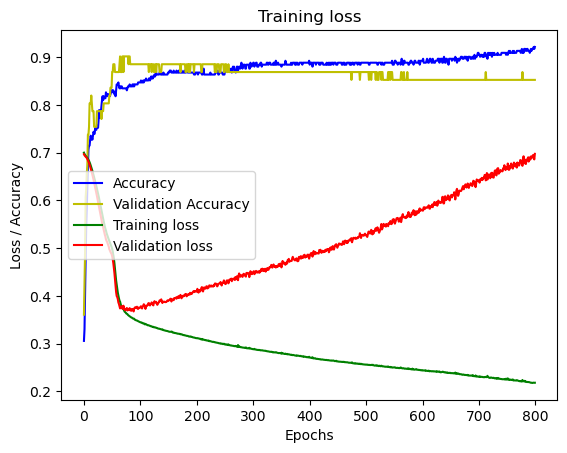

In [25]:
"""
    Camadas escondidas e neurônios de modelos anteriores.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
fifith_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)

fifith_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
"""
    epochs: 800 - Diminuindo a época para 
"""
fifith_history = fifith_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)

plot_lost_history(fifith_history)

### Testando modelos regularizados

In [26]:
"""
    Testando alguns modelos regularizados para optimizar acurácia e evitar overfiting.
    Valores dos lambdas escolhidos aleatóriamente.
    Rede neural com a configuração de camadas e neurônios de modelos anteriores. 
"""
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(9, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(3, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'sigmoid')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=['accuracy']
    )
    """
        Equilibrando as épocas com base nos modelos que foram rodados anteriormente.
    """
    models[i].fit(
        X_train,y_train,
        epochs=1000,
        validation_data=(X_test, y_test)
    )
    # Print do lambda que o modelo usou.
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 0.7151 - accuracy: 0.4504 - val_loss: 0.7179 - val_accuracy: 0.4754
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4504 - val_loss: 0.7034 - val_accuracy: 0.4754
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.4504 - val_loss: 0.6908 - val_accuracy: 0.4754
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.4504 - val_loss: 0.6808 - val_accuracy: 0.4754
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.4504 - val_loss: 0.6715 - val_accuracy: 0.4754
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.4504 - val_loss: 0.6628 - val_accuracy: 0.4754
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7036 - accuracy: 0.4062

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.4504 - val_loss: 0.6543 - val_accuracy: 0.4754
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.4545 - val_loss: 0.6458 - val_accuracy: 0.4754
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.4545 - val_loss: 0.6373 - val_accuracy: 0.4754
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.4628 - val_loss: 0.6292 - val_accuracy: 0.4754
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.5124 - val_loss: 0.6211 - val_accuracy: 0.5902
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.6570 - val_loss: 0.6133 - val_accuracy: 0.6230
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.7107 - val_loss: 0.6058 - val_accuracy: 0.6557
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 0.7282 - accuracy: 0.5702 - val_loss: 0.7325 - val_accuracy: 0.5574
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.6157 - val_loss: 0.7239 - val_accuracy: 0.5902
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.6529 - val_loss: 0.7160 - val_accuracy: 0.5738
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.6612 - val_loss: 0.7094 - val_accuracy: 0.5738
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.6653 - val_loss: 0.7033 - val_accuracy: 0.6066
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.6488 - val_loss: 0.6970 - val_accuracy: 0.6557
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.7188

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.6860 - val_loss: 0.6901 - val_accuracy: 0.7049
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.7603 - val_loss: 0.6831 - val_accuracy: 0.7377
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.7851 - val_loss: 0.6764 - val_accuracy: 0.7541
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.7769 - val_loss: 0.6698 - val_accuracy: 0.8361
Epoch 11/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.7851 - val_loss: 0.6633 - val_accuracy: 0.8197
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.7727 - val_loss: 0.6566 - val_accuracy: 0.8197
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.7727 - val_loss: 0.6499 - val_accuracy: 0.8525
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 0.7743 - accuracy: 0.6612 - val_loss: 0.7756 - val_accuracy: 0.5738
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7625 - accuracy: 0.6942 - val_loss: 0.7641 - val_accuracy: 0.6066
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7536 - accuracy: 0.6860 - val_loss: 0.7537 - val_accuracy: 0.6230
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.6860 - val_loss: 0.7452 - val_accuracy: 0.6393
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7387 - accuracy: 0.6653 - val_loss: 0.7379 - val_accuracy: 0.6393
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.6653 - val_loss: 0.7314 - val_accuracy: 0.6393
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7019 - accuracy: 0.7188

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.7258 - accuracy: 0.6694 - val_loss: 0.7248 - val_accuracy: 0.6557
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7194 - accuracy: 0.6818 - val_loss: 0.7185 - val_accuracy: 0.6557
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.6901 - val_loss: 0.7124 - val_accuracy: 0.6557
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.6942 - val_loss: 0.7066 - val_accuracy: 0.6885
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7016 - accuracy: 0.7025 - val_loss: 0.7010 - val_accuracy: 0.6885
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.7149 - val_loss: 0.6955 - val_accuracy: 0.6885
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.7190 - val_loss: 0.6903 - val_accuracy: 0.7049
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 1.3961 - accuracy: 0.4463 - val_loss: 1.4072 - val_accuracy: 0.3279
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3647 - accuracy: 0.4669 - val_loss: 1.3756 - val_accuracy: 0.3279
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3338 - accuracy: 0.4752 - val_loss: 1.3453 - val_accuracy: 0.3279
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3050 - accuracy: 0.4793 - val_loss: 1.3156 - val_accuracy: 0.3443
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2768 - accuracy: 0.4876 - val_loss: 1.2872 - val_accuracy: 0.3443
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2507 - accuracy: 0.4959 - val_loss: 1.2592 - val_accuracy: 0.3443
Epoch 7/1000


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 1.2254 - accuracy: 0.5165 - val_loss: 1.2327 - val_accuracy: 0.3607
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2011 - accuracy: 0.5165 - val_loss: 1.2078 - val_accuracy: 0.3770
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1779 - accuracy: 0.5413 - val_loss: 1.1833 - val_accuracy: 0.4426
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1547 - accuracy: 0.5661 - val_loss: 1.1595 - val_accuracy: 0.5082
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1327 - accuracy: 0.6116 - val_loss: 1.1367 - val_accuracy: 0.5410
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1116 - accuracy: 0.6240 - val_loss: 1.1159 - val_accuracy: 0.5246
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.0908 - accuracy: 0.6157 - val_loss: 1.0956 - val_accuracy: 0.5410
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 16ms/step - loss: 1.7030 - accuracy: 0.6157 - val_loss: 1.6737 - val_accuracy: 0.5246
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.6561 - accuracy: 0.5826 - val_loss: 1.6277 - val_accuracy: 0.5410
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.6112 - accuracy: 0.5579 - val_loss: 1.5829 - val_accuracy: 0.5738
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.5675 - accuracy: 0.5702 - val_loss: 1.5402 - val_accuracy: 0.5738
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.5260 - accuracy: 0.5702 - val_loss: 1.4995 - val_accuracy: 0.5574
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.5163 - accuracy: 0.4375

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 1.4864 - accuracy: 0.5620 - val_loss: 1.4611 - val_accuracy: 0.5574
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4492 - accuracy: 0.5620 - val_loss: 1.4245 - val_accuracy: 0.5574
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4140 - accuracy: 0.5579 - val_loss: 1.3899 - val_accuracy: 0.5410
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3805 - accuracy: 0.5496 - val_loss: 1.3573 - val_accuracy: 0.5410
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3486 - accuracy: 0.5496 - val_loss: 1.3266 - val_accuracy: 0.5410
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3184 - accuracy: 0.5496 - val_loss: 1.2973 - val_accuracy: 0.5410
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2894 - accuracy: 0.5496 - val_loss: 1.2694 - val_accuracy: 0.5246
Epoch 13/1000
8/8 [===========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 3.1286 - accuracy: 0.6157 - val_loss: 3.0663 - val_accuracy: 0.5246
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.0264 - accuracy: 0.5496 - val_loss: 2.9662 - val_accuracy: 0.5246
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.9280 - accuracy: 0.5496 - val_loss: 2.8700 - val_accuracy: 0.5246
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.8328 - accuracy: 0.5496 - val_loss: 2.7775 - val_accuracy: 0.5246
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.7417 - accuracy: 0.5496 - val_loss: 2.6884 - val_accuracy: 0.5246
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.7205 - accuracy: 0.4375

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 2.6541 - accuracy: 0.5496 - val_loss: 2.6026 - val_accuracy: 0.5246
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.5703 - accuracy: 0.5496 - val_loss: 2.5201 - val_accuracy: 0.5246
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.4899 - accuracy: 0.5496 - val_loss: 2.4415 - val_accuracy: 0.5246
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.4132 - accuracy: 0.5496 - val_loss: 2.3668 - val_accuracy: 0.5246
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.3396 - accuracy: 0.5496 - val_loss: 2.2958 - val_accuracy: 0.5246
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2694 - accuracy: 0.5496 - val_loss: 2.2277 - val_accuracy: 0.5246
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2019 - accuracy: 0.5496 - val_loss: 2.1625 - val_accuracy: 0.5246
Epoch 13/1000
8/8 [===========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 16ms/step - loss: 4.8243 - accuracy: 0.4504 - val_loss: 4.7142 - val_accuracy: 0.4754
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.6585 - accuracy: 0.4504 - val_loss: 4.5538 - val_accuracy: 0.4754
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.4999 - accuracy: 0.4504 - val_loss: 4.3988 - val_accuracy: 0.4918
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.3458 - accuracy: 0.4587 - val_loss: 4.2500 - val_accuracy: 0.4918
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.1982 - accuracy: 0.4669 - val_loss: 4.1070 - val_accuracy: 0.4754
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 4.1003 - accuracy: 0.5625

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 4.0562 - accuracy: 0.4587 - val_loss: 3.9699 - val_accuracy: 0.5082
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.9203 - accuracy: 0.4835 - val_loss: 3.8378 - val_accuracy: 0.5082
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.7899 - accuracy: 0.4959 - val_loss: 3.7108 - val_accuracy: 0.5082
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.6643 - accuracy: 0.5248 - val_loss: 3.5889 - val_accuracy: 0.5410
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5436 - accuracy: 0.5992 - val_loss: 3.4720 - val_accuracy: 0.5738
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.4283 - accuracy: 0.6488 - val_loss: 3.3597 - val_accuracy: 0.6557
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.3172 - accuracy: 0.6322 - val_loss: 3.2519 - val_accuracy: 0.6885
Epoch 13/1000
8/8 [===========

MODELO: 0


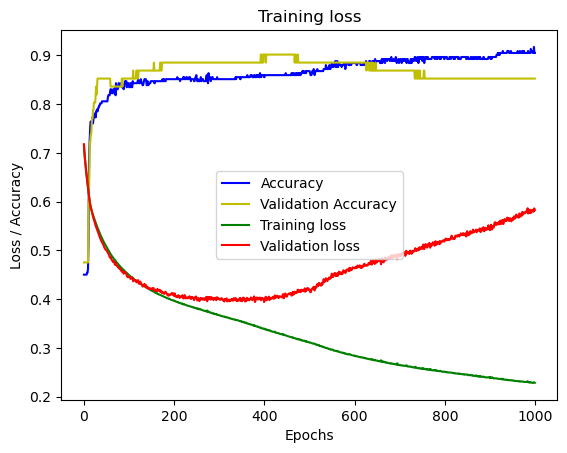

MODELO: 1


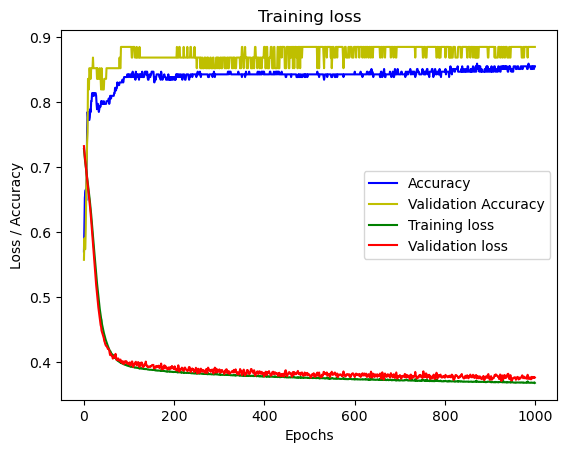

MODELO: 2


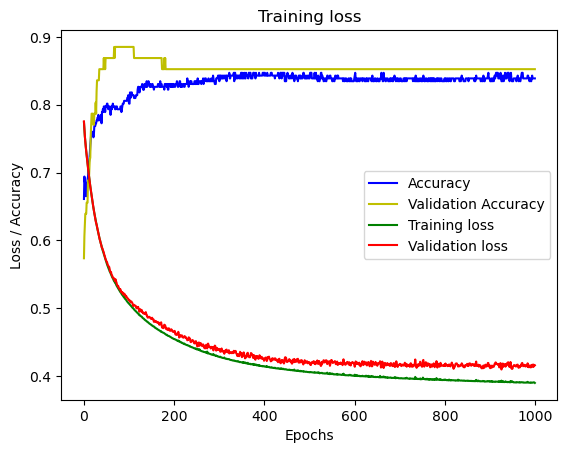

MODELO: 3


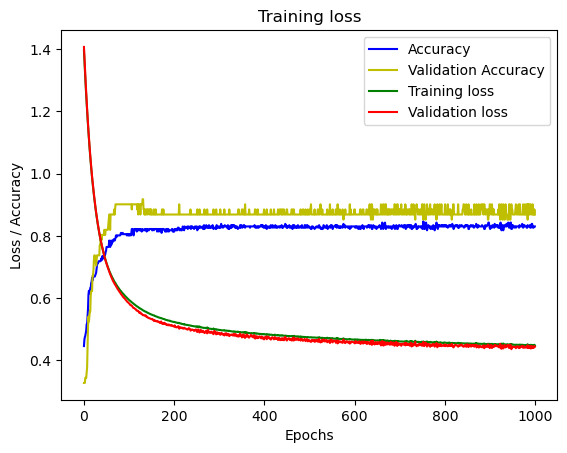

MODELO: 4


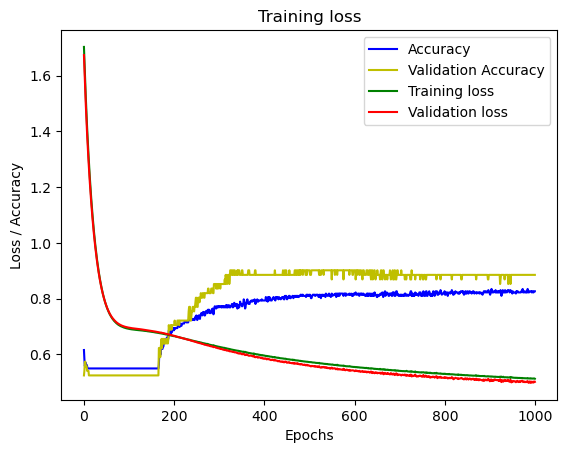

MODELO: 5


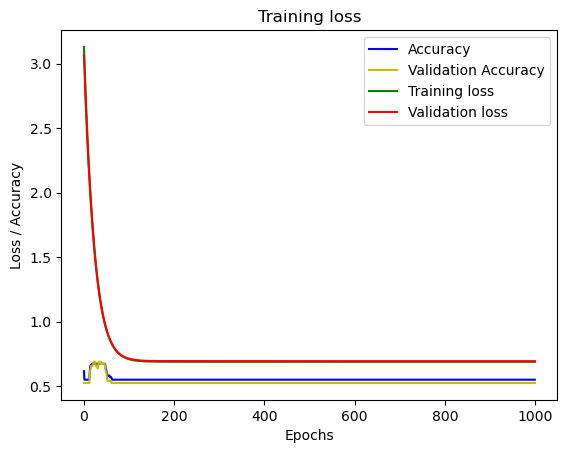

MODELO: 6


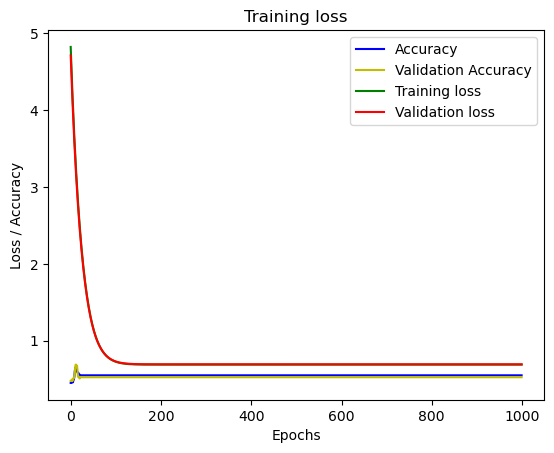

In [27]:
for i in range(0, len(models)):
    print(f"MODELO: {i}")
    plot_lost_history(models[i].history)

## Selecão de modelo e comparação

### Compração de modelos

#### Modelo Regularizado 1 

In [28]:
model_1 = models[1]
predicted = model_1.predict(X_test)
y_hat = append_to_binary_results(predicted, .55)

report(y_test, y_hat)

2/2 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



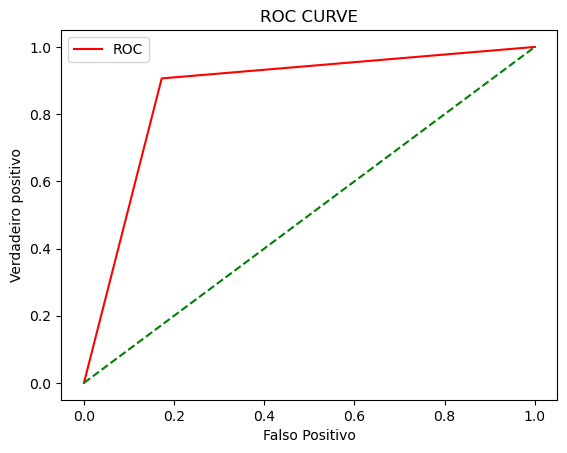

In [29]:
plot_roc_curve(y_test, y_hat)

In [30]:
_confusion_matrix(y_test, y_hat)

[[24  5]
 [ 3 29]]


#### Modelo Regularizado  2

In [31]:
model_2 = models[2]

predicted = model_2.predict(X_test)
y_hat = append_to_binary_results(predicted, .55)

report(y_test, y_hat)

2/2 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



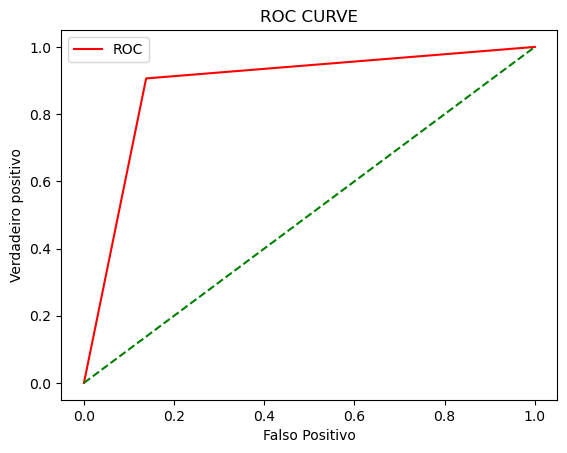

In [32]:
plot_roc_curve(y_test, y_hat)

In [33]:
_confusion_matrix(y_test, y_hat)

[[25  4]
 [ 3 29]]


#### Modelo 3

In [34]:
model_3 = fifith_model
predicted = model_3.predict(X_test)
y_hat = append_to_binary_results(predicted, .55)

report(y_test, y_hat)

2/2 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



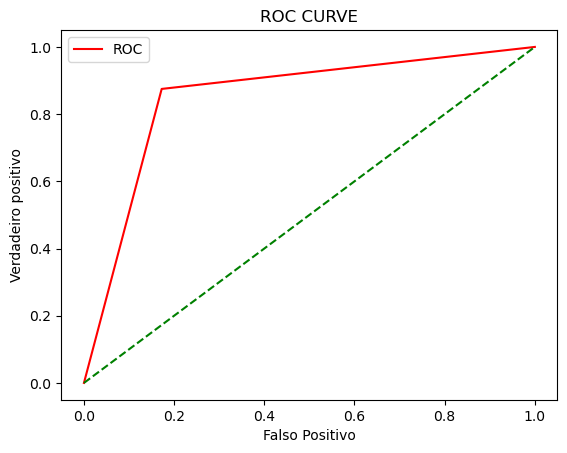

In [35]:
plot_roc_curve(y_test, y_hat)

In [36]:
_confusion_matrix(y_test, y_hat)

[[24  5]
 [ 4 28]]


## Conclusão

Embora o dataset seja pequeno, boas predições foram geradas, tanto nos modelos sem regularização, quanto nos modelos regularizados.

Para ter predições melhores, um dataset maior seria bem-vindo, pois o atual possui apenas 303 entradas.

Com as entradas presentes no dataset, todos os modelos escolhidos para análise tiveram a acurácia semelhante, porém, o "Modelo 2 regularizado" teve um desempenho levemente melhor.